In [117]:
import requests
import json
import pandas as pd 
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

conn = sqlite3.connect('spotify2.db')
c = conn.cursor()

In [87]:
c.execute('''DROP TABLE drake_albums''')

In [86]:
headers_value = 'BQDzCcbdHPo6b-1o-HVlar8aosM2tcAlFj0z3xLLjVppcjd89oHsGo_zmJiRB6mxHjNOUdKVdpmbk8vELfhke6CTE_jn0axzPLR8dmDRQ10ZwEDM0wQxpQAi0G22hv0z_ftBzH7kQW9d01sm3EQ'
headers = {'Authorization':f'Bearer {headers_value}'}
        
def get_album_SQL(album_id, table_name):
    resp = requests.get(f'https://api.spotify.com/v1/albums/{album_id}', headers = headers)
    data_json = resp.json()
    
    c = conn.cursor()
    c.execute(f'''CREATE TABLE IF NOT EXISTS {table_name}
                 ([index] INTEGER PRIMARY KEY,
                 [song_name] text, 
                 [song_id] text,
                 [album_name] text,
                 [popularity] integer,
                 [artist_name] text,
                 [speechiness] float, 
                 [danceability] float)''')
        
    for i in data_json['tracks']['items']:  
        c.execute(f'''INSERT INTO {table_name} 
                    (song_name, song_id, album_name, artist_name)
                    VALUES(?,?,?, ?)''', 
                    (i['name'],
                     i['id'], data_json['name'],
                     i['artists'][0]['name'],   
                    ))
        
    
        conn.commit()
         
        c.execute(f'SELECT * FROM {table_name}')
        
        
        c.fetchall()

In [136]:
data_json['tracks']['items'][0].items()

dict_items([('artists', [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'}, 'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4', 'id': '3TVXtAsR1Inumwj472S9r4', 'name': 'Drake', 'type': 'artist', 'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}]), ('available_markets', ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA']), ('disc_number', 1), ('duration_ms', 176179), ('explicit', True), ('external_urls', {'spotify': 'https://open.spotify.com/track/1v24T2ug4TlssYZvI3aL4O'}), ('href', 'https://api.spotify.com/v1/tracks/1v

In [88]:
import math
def song_audio_features(df, table_name):
    '''takes in dataframe table and corresponding SQL table and returns dataframe with audio features for the songs'''
   
    song_ids = list(df['song_id'])
    
    
    #if len(song_ids) < 100:
    for i in range(0, math.ceil(len(song_ids)/100)):
        abbr_list = song_ids[i:i+100]    
        
        formatted = (",".join(abbr_list))
        resp = requests.get(f'https://api.spotify.com/v1/audio-features?ids={formatted}', headers = headers)
        data_json = resp.json()
        
        for j in data_json['audio_features']:
            #print(i['speechiness'], i['danceability'], i['id'])
            try:
                c.execute(f'''UPDATE {table_name} 
                              SET speechiness = ?, 
                                  danceability = ?
                              WHERE song_id = ?''', (j['speechiness'], j['danceability'], j['id']))
                conn.commit()
            except:
                print(j)
     
    return SQL_to_dataframe(f'{table_name}')
    
   

In [99]:
def SQL_to_dataframe(table_name):
    '''takes in SQL table_name and converts to pandas dataframe, returning the head of the dataframe'''
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn, index_col='index')
    return df    

In [89]:
get_album_SQL('1LShhEEKRT5MNPcO7jtYHh', 'drake_albums')

In [90]:
get_album_SQL('1ATL5GLyefJaxhQzSPVrLX', 'drake_albums')

In [91]:
get_album_SQL('1lXY618HWkwYKJWBRYR4MK', 'drake_albums')

In [92]:
get_album_SQL('40GMAhriYJRO1rsY4YdrZb', 'drake_albums')

In [93]:
get_album_SQL('1ozpmkWcCHwsQ4QTnxOOdT', 'drake_albums')

In [94]:
get_album_SQL('0ptlfJfwGTy0Yvrk14JK1I', 'drake_albums')

In [95]:
get_album_SQL('2gXTTQ713nCELgPOS0qWyt', 'drake_albums')

In [96]:
get_album_SQL('6X1x82kppWZmDzlXXK3y3q', 'drake_albums')

In [97]:
get_album_SQL('6agmeioaDOBupymziJihgB', 'drake_albums')

In [100]:
df = SQL_to_dataframe('drake_albums')

In [101]:
drake_df = song_audio_features(df, 'drake_albums')

In [111]:
drake_df

,song_name,song_id,album_name,popularity,artist_name,speechiness,danceability
index,,,,,,,
1,Lust For Life,1v24T2ug4TlssYZvI3aL4O,So Far Gone,None,None,0.1750,0.462
2,Houstatlantavegas,3XLSlQLJf3Ut0zvMUxnF1h,So Far Gone,None,None,0.0574,0.683
3,Successful (feat. Trey Songz & Lil Wayne),6NwhtCYkfwWlcR62Ac4E7y,So Far Gone,None,None,0.3690,0.562
4,Let’s Call It Off (feat. Peter Bjorn and John),4FDSPGncHRpr6yB8DD4CtI,So Far Gone,None,None,0.0327,0.790
5,November 18th,0JaVdpmiex2EP7bBzyKVTa,So Far Gone,None,None,0.5070,0.749
6,Ignant Shit (feat. Lil Wayne),2hcohLIysMxofYziluXCoX,So Far Gone,None,None,0.2760,0.591
7,A Night Off (feat. Lloyd),3lkkkYc1wBj5l3FVlpqvP6,So Far Gone,None,None,0.0741,0.611
8,Say What's Real,7mPoCVGP752A5DtHf1SKkM,So Far Gone,None,None,0.2880,0.462
9,Little Bit (feat. Lykke Li),524wvipGqxPKYWxkjf9y46,So Far Gone,None,None,0.0374,0.758


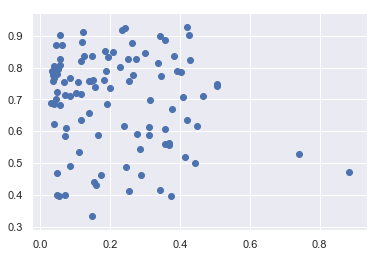

In [121]:
plt.scatter(drake_df['speechiness'], drake_df['danceability'])